In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
df = pd.read_csv(r"C:\Users\Squeaking_Turtle\Desktop\MRM Task Phase\Task 4\CarPrice_Assignment.csv")

In [209]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [210]:
print("Actual columns in dataset:", df.columns.tolist())

Actual columns in dataset: ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [211]:
categorical_features = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 
                        'enginetype', 'cylindernumber', 'fuelsystem']
numerical_features = ['symboling', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
target = 'price'

# Label Encoding (Ordinal)
df['doornumber'] = df['doornumber'].map({'two': 0, 'four': 1})
df['cylindernumber'] = df['cylindernumber'].map({'two': 0, 'three': 1, 'four': 2, 'five': 3, 'six': 4, 'eight': 5, 'twelve': 6})

# One-Hot Encoding (Nominal)
nominal_cols = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'fuelsystem','enginetype']
for col in nominal_cols:
    if col in df.columns:
        print(f"Encoding: {col} - Unique values:", df[col].unique())
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df.drop(columns=[col], inplace=True)
        df = pd.concat([df, dummies], axis=1)

# Save the preprocessed dataset
df.to_csv("Preprocessed_CarPrice.csv", index=False)

Encoding: fueltype - Unique values: ['gas' 'diesel']
Encoding: aspiration - Unique values: ['std' 'turbo']
Encoding: carbody - Unique values: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Encoding: drivewheel - Unique values: ['rwd' 'fwd' '4wd']
Encoding: fuelsystem - Unique values: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Encoding: enginetype - Unique values: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In [212]:
df

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,3,alfa-romero giulia,0,front,88.6,168.8,64.1,48.8,2548,...,False,True,False,False,False,False,False,False,False,False
1,2,3,alfa-romero stelvio,0,front,88.6,168.8,64.1,48.8,2548,...,False,True,False,False,False,False,False,False,False,False
2,3,1,alfa-romero Quadrifoglio,0,front,94.5,171.2,65.5,52.4,2823,...,False,True,False,False,False,False,False,False,True,False
3,4,2,audi 100 ls,1,front,99.8,176.6,66.2,54.3,2337,...,False,True,False,False,False,False,True,False,False,False
4,5,2,audi 100ls,1,front,99.4,176.6,66.4,54.3,2824,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,front,109.1,188.8,68.9,55.5,2952,...,False,True,False,False,False,False,True,False,False,False
201,202,-1,volvo 144ea,1,front,109.1,188.8,68.8,55.5,3049,...,False,True,False,False,False,False,True,False,False,False
202,203,-1,volvo 244dl,1,front,109.1,188.8,68.9,55.5,3012,...,False,True,False,False,False,False,False,False,True,False
203,204,-1,volvo 246,1,front,109.1,188.8,68.9,55.5,3217,...,False,False,False,False,False,False,True,False,False,False


In [213]:
print(df.dtypes)  # Check column data types

car_ID                 int64
symboling              int64
CarName               object
doornumber             int64
enginelocation        object
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
cylindernumber         int64
enginesize             int64
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
fueltype_gas            bool
aspiration_turbo        bool
carbody_hardtop         bool
carbody_hatchback       bool
carbody_sedan           bool
carbody_wagon           bool
drivewheel_fwd          bool
drivewheel_rwd          bool
fuelsystem_2bbl         bool
fuelsystem_4bbl         bool
fuelsystem_idi          bool
fuelsystem_mfi          bool
fuelsystem_mpfi         bool
fuelsystem_spdi         bool
fuelsystem_spf

In [223]:
# Ensure columns exist before dropping
cols_to_drop = ['CarName', 'enginelocation']

# Check which columns exist in df
existing_cols = [col for col in cols_to_drop if col in df.columns]

# Drop only if they exist
if existing_cols:
    df.drop(columns=existing_cols, inplace=True)
else:
    
    print(f" Warning: Some columns not found in df: {cols_to_drop}")

# Define final feature list (all numerical + encoded categorical)
features = numerical_features + [col for col in df.columns if col.startswith(tuple(categorical_features))]

# Convert to NumPy arrays
X = df.drop(columns=['price']).values
y = df[target].values.reshape(-1, 1)  # Convert price column to column vector


In [215]:
print(df.dtypes)  # Check column data types

car_ID                 int64
symboling              int64
doornumber             int64
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
cylindernumber         int64
enginesize             int64
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
fueltype_gas            bool
aspiration_turbo        bool
carbody_hardtop         bool
carbody_hatchback       bool
carbody_sedan           bool
carbody_wagon           bool
drivewheel_fwd          bool
drivewheel_rwd          bool
fuelsystem_2bbl         bool
fuelsystem_4bbl         bool
fuelsystem_idi          bool
fuelsystem_mfi          bool
fuelsystem_mpfi         bool
fuelsystem_spdi         bool
fuelsystem_spfi         bool
enginetype_dohcv        bool
enginetype_l  

In [216]:
# Ensure X is a NumPy array
X = np.array(X, dtype=np.float64)  

# Verify X has multiple columns
if X.ndim == 1:
    X = X.reshape(-1, 1)  # Convert to 2D if it's 1D

# Manual normalization (Standardization)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

# Avoid division by zero (Replace zeros with 1)
X_std[X_std == 0] = 1  

X = (X - X_mean) / X_std  # Normalize features

# Add bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones

In [217]:
print(df.dtypes)  # Check column data types


car_ID                 int64
symboling              int64
doornumber             int64
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
cylindernumber         int64
enginesize             int64
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
fueltype_gas            bool
aspiration_turbo        bool
carbody_hardtop         bool
carbody_hatchback       bool
carbody_sedan           bool
carbody_wagon           bool
drivewheel_fwd          bool
drivewheel_rwd          bool
fuelsystem_2bbl         bool
fuelsystem_4bbl         bool
fuelsystem_idi          bool
fuelsystem_mfi          bool
fuelsystem_mpfi         bool
fuelsystem_spdi         bool
fuelsystem_spfi         bool
enginetype_dohcv        bool
enginetype_l  

In [218]:
# Initialize parameters (theta) to zero
theta = np.zeros((X.shape[1], 1), dtype=np.float64)
# Set hyperparameters
learning_rate = 0.01  # Alpha
num_iterations = 1000  # Number of iterations
m = len(y)  # Number of training samples

# Gradient Descent Implementation
cost_history = []  # To track cost function values

for i in range(num_iterations):
    y_pred = X @ theta  # Compute predictions
    error = y_pred - y  # Compute error
    gradient = (1/m) * (X.T @ error)  # Compute gradient
    theta -= learning_rate * np.array(gradient, dtype=np.float64)
    
    # Compute cost function (Mean Squared Error)
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

# Print final model parameters
print("Intercept:", theta[0][0])
print("Coefficients:", theta[1:].flatten())

Intercept: 13276.137398574861
Coefficients: [-1101.29509157   503.72413149   157.60745692   455.90386058
  -130.02129827  1114.64027752   735.36997309  1396.78107031
  1835.10294846  2833.84087832    86.73793246  -828.56656332
    49.78081682  1691.85261056   715.09933932   207.48003301
   469.7691248   -248.93429539   300.2102798     43.71320397
  -826.06673359  -642.7835133   -849.80283029  -100.88896589
   816.90881493   124.45935426   167.83820517   248.93429539
  -170.67832248   185.77515553  -139.15471116  -125.65245758
  -306.72114093  -222.01222048   963.29337647   680.15436189
  -865.23635398  1036.12936055]


In [219]:
# Predict on training data
y_pred = X @ theta

# Display actual vs predicted values
comparison = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
print(comparison.head())

    Actual     Predicted
0  13495.0  14442.460029
1  16500.0  14423.850061
2  16500.0  16277.705413
3  13950.0  13466.839778
4  17450.0  18738.712049


In [220]:
# Mean Absolute Error (MAE)
mae = np.mean(np.abs(y - y_pred))

# Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 1679.699059655331
MSE: 5471108.586608324
RMSE: 2339.040099401531


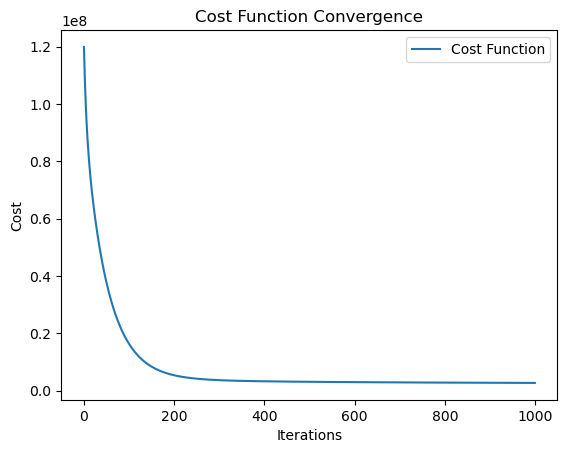

In [221]:
plt.plot(range(num_iterations), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()


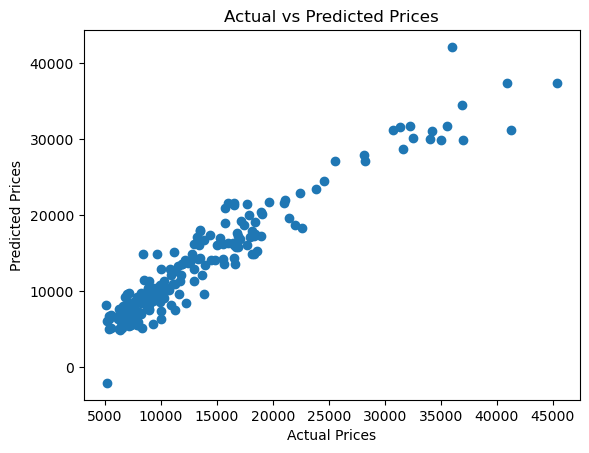

In [222]:
plt.scatter(y, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
